## **Latar Belakang**
Model pre-trained seperti BERT, DistilBERT, dan RoBERTa unggul dalam tugas NLP karena dilatih pada korpus teks besar, memahami konteks kata dalam kalimat. Transfer learning memungkinkan penggunaan pengetahuan mereka pada dataset kecil untuk tugas spesifik, meningkatkan akurasi dan efisiensi pelatihan.

## **Quick EDA**

untuk dataset yang digunakan :
<br>https://www.kaggle.com/datasets/notkrishna/harry-potter-reviews/data
<br>berisikan beberapa reviews dari series Harry Potter yang ada di website 
<br>https://www.goodreads.com/search?q=harry+potter&ref=nav_sb_noss_l_12   


import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read Data
df = pd.read_csv('data\harry_reviews.csv')

# Menampilkan lima baris pertama dari DataFrame
df.head()

,book,name,date,rating,likes,description,stars_given
0,Harry Potter and the Sorcerer's Stone,MirandaReads,"Nov11,2019",itwasamazing,1657 likes,Stuck at home? Got some time on your hands? Wa...,5.0
1,Harry Potter and the Sorcerer's Stone,Kai,"Apr02,2015",NaN,993 likes,Let's do this thing where we promote and recom...,NaN
2,Harry Potter and the Sorcerer's Stone,Lora,"Jun03,2011",itwasamazing,1599 likes,I'm going to keep this brief since there isn't...,5.0
3,Harry Potter and the Sorcerer's Stone,★Jess,"Dec10,2009",itwasamazing,831 likes,My original review was a comparison of sorts b...,5.0
4,Harry Potter and the Sorcerer's Stone,Matthew,"Jan08,2013",itwasamazing,911 likes,One of my first jobs was at a bookstore. When ...,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book         720 non-null    object 
 1   name         720 non-null    object 
 2   date         720 non-null    object 
 3   rating       690 non-null    object 
 4   likes        720 non-null    object 
 5   description  719 non-null    object 
 6   stars_given  690 non-null    float64
dtypes: float64(1), object(6)
memory usage: 39.5+ KB


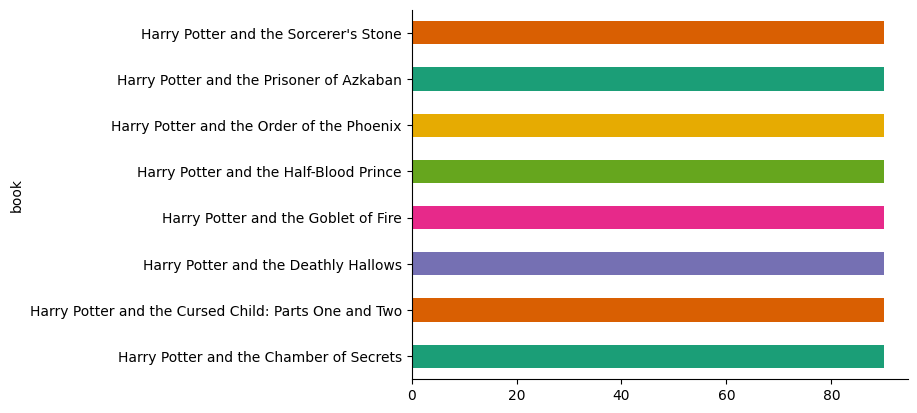

In [ ]:
# @title book

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('book').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

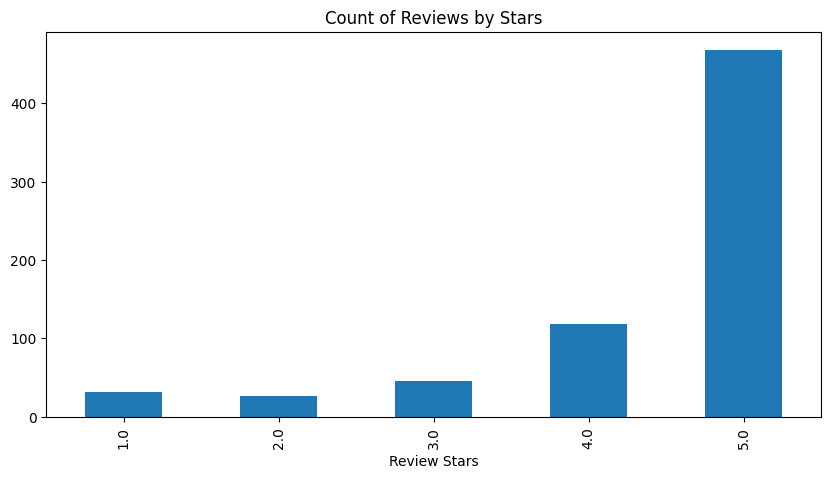

In [ ]:
ax = df['stars_given'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
# Misalkan df adalah DataFrame awal Anda
df_reviews = df[['description', 'stars_given']]

# Mengubah nama kolom
df_reviews = df_reviews.rename(columns={'description': 'text_reviews', 'stars_given': 'sentiment'})

# Menghapus baris dengan rating NaN
df_reviews = df_reviews.dropna(subset=['sentiment'])

# Mengubah nilai rating dari float ke integer
df_reviews['sentiment'] = df_reviews['sentiment'].astype(int)

# Mengubah tipe data kolom 'Review Text' menjadi string
df_reviews['text_reviews'] = df_reviews['text_reviews'].astype(str)

# Menghapus kolom "Unnamed" jika ada
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 719
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_reviews  690 non-null    object
 1   sentiment     690 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 16.2+ KB


memastikan bahwa kolom Sentiment berisi label sentimen yang sesuai berdasarkan rating

In [ ]:
# Menentukan label sentimen berdasarkan rating
def determine_sentiment(stars):
    if stars in [1, 2]:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    elif stars in [4, 5]:
        return 'positive'
    else:
        return None

# Terapkan fungsi determine_sentiment ke kolom Sentiment
df_reviews['sentiment'] = df_reviews['sentiment'].apply(determine_sentiment)

# Menampilkan lima baris pertama dari DataFrame yang telah diubah namanya dan dilabeli ulang
print(df_reviews)

                                          text_reviews sentiment
0    Stuck at home? Got some time on your hands? Wa...  positive
2    I'm going to keep this brief since there isn't...  positive
3    My original review was a comparison of sorts b...  positive
4    One of my first jobs was at a bookstore. When ...  positive
5    Rereading for the 3rd time for the group read....  positive
..                                                 ...       ...
715  Buddy Re-Read continues!I read this last almos...  positive
716  This is when Rowling really focused on the fin...  positive
717  I still love this series after many rereads!Ha...  positive
718  Oh man even 14 years later this ending SUCKS!I...  positive
719  Trigger warnings: Child abuse, bullying, slave...  positive

[690 rows x 2 columns]


## Build Model

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
# DataFrame df_reviews sudah tersedia
df_reviews.head()

,text_reviews,sentiment
0,Stuck at home? Got some time on your hands? Wa...,positive
2,I'm going to keep this brief since there isn't...,positive
3,My original review was a comparison of sorts b...,positive
4,One of my first jobs was at a bookstore. When ...,positive
5,Rereading for the 3rd time for the group read....,positive


### Preprocessing Data

In [ ]:
# Encode the labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_reviews['sentiment'] = df_reviews['sentiment'].map(label_mapping)

# Split data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df_reviews['text_reviews'], df_reviews['sentiment'], test_size=0.2, random_state=42)

### Tokenisasi Data

In [ ]:
# Tokenizer for BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Convert the Pandas Series to a list of strings
bert_train_encodings = bert_tokenizer(train_texts.tolist(), truncation=True, padding=True)
bert_test_encodings = bert_tokenizer(test_texts.tolist(), truncation=True, padding=True)

# Tokenizer for DistilBERT
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Convert the Pandas Series to a list of strings
distilbert_train_encodings = distilbert_tokenizer(train_texts.tolist(), truncation=True, padding=True)
distilbert_test_encodings = distilbert_tokenizer(test_texts.tolist(), truncation=True, padding=True)

# Tokenizer for RoBERTa
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
# Convert the Pandas Series to a list of strings
roberta_train_encodings = roberta_tokenizer(train_texts.tolist(), truncation=True, padding=True)
roberta_test_encodings = roberta_tokenizer(test_texts.tolist(), truncation=True, padding=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

### Mempersiapkan Dataset untuk PyTorch

In [ ]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

bert_train_dataset = SentimentDataset(bert_train_encodings, train_labels)
bert_test_dataset = SentimentDataset(bert_test_encodings, test_labels)

distilbert_train_dataset = SentimentDataset(distilbert_train_encodings, train_labels)
distilbert_test_dataset = SentimentDataset(distilbert_test_encodings, test_labels)

roberta_train_dataset = SentimentDataset(roberta_train_encodings, train_labels)
roberta_test_dataset = SentimentDataset(roberta_test_encodings, test_labels)

### Train Model

In [ ]:
def train_and_evaluate(model_name, model, train_dataset, test_dataset):
    training_args = TrainingArguments(
        output_dir=f'./results_{model_name}',
        num_train_epochs=3,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir=f'./logs_{model_name}',
        logging_steps=10,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    eval_results = trainer.evaluate()
    return eval_results

### Menghitung metrik:

In [ ]:
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='weighted')
    acc = accuracy_score(labels, pred)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

#### Mengevaluasi model BERT:

In [ ]:
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
bert_results = train_and_evaluate('bert', bert_model, bert_train_dataset, bert_test_dataset)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,1.120100
20,1.030000
30,0.957800
40,0.868200
50,0.783600
60,0.660200
70,0.594400
80,0.491700
90,0.504800
100,0.552300


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Mengevaluasi model DistilBERT

In [ ]:
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
distilbert_results = train_and_evaluate('distilbert', distilbert_model, distilbert_train_dataset, distilbert_test_dataset)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,1.094300
20,1.075900
30,1.022800
40,0.941700
50,0.813000
60,0.685100
70,0.621200
80,0.507800
90,0.497700
100,0.532300


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Mengevaluasi model RoBERTa

In [ ]:
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
roberta_results = train_and_evaluate('roberta', roberta_model, roberta_train_dataset, roberta_test_dataset)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,1.056100
20,1.042400
30,0.988800
40,0.937000
50,0.855600
60,0.655700
70,0.563600
80,0.457900
90,0.538700
100,0.580600


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Perbandingan Hasil

In [ ]:
results = {
    'BERT': bert_results,
    'DistilBERT': distilbert_results,
    'RoBERTa': roberta_results
}

df_results = pd.DataFrame(results)
print(df_results)

                              BERT  DistilBERT    RoBERTa
eval_loss                 0.496798    0.469974   0.507164
eval_accuracy             0.862319    0.862319   0.862319
eval_f1                   0.798568    0.798568   0.798568
eval_precision            0.743594    0.743594   0.743594
eval_recall               0.862319    0.862319   0.862319
eval_runtime              3.868300    2.260000   4.258000
eval_samples_per_second  35.675000   61.061000  32.410000
eval_steps_per_second     4.653000    7.965000   4.227000
epoch                     3.000000    3.000000   3.000000


### **Analisis Metrik**

1. eval_loss:

Nilai loss yang lebih rendah menunjukkan bahwa model lebih baik dalam memprediksi data validasi.
DistilBERT memiliki eval_loss terendah (0.469974), diikuti oleh BERT (0.496798) dan RoBERTa (0.507164).

2. eval_accuracy:

Semua model memiliki eval_accuracy yang sama (0.862319).
eval_f1, eval_precision, eval_recall:

Semua model memiliki nilai f1, precision, dan recall yang sama (f1: 0.798568, precision: 0.743594, recall: 0.862319).

3. eval_runtime dan eval_samples_per_second:

DistilBERT memiliki runtime terendah (2.260000) dan eval_samples_per_second tertinggi (61.061000), yang menunjukkan bahwa model ini lebih cepat dalam melakukan inferensi.

### **Kesimpulan**
Berdasarkan analisis saya, DistilBERT sepertinya menjadi model terbaik karena:

* Memiliki eval_loss terendah, menunjukkan bahwa model ini lebih baik dalam memprediksi data validasi dibandingkan dengan BERT dan RoBERTa.
* Memiliki eval_runtime terendah dan eval_samples_per_second tertinggi, menunjukkan bahwa model ini lebih efisien dan cepat dalam melakukan inferensi.
* Memiliki eval_accuracy, eval_f1, eval_precision, dan eval_recall yang sama dengan BERT dan RoBERTa.

### Langkah-langkah untuk Meningkatkan Akurasi Model:

1. Menggunakan lebih banyak data untuk pelatihan.
2. Melakukan hyperparameter tuning, misalnya menyesuaikan learning rate, batch size, atau jumlah epoch.
3. Menggunakan teknik data augmentation untuk memperkaya variasi data pelatihan.
4. Mencoba model pre-trained lain yang lebih baru atau spesifik untuk tugas tertentu.
5. Fine-tuning layer lebih lanjut pada model pre-trained.